##  Data Understanding And Preparation

In [31]:
import numpy as np
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Read dataset
df = pd.read_csv("diabetes-dataset.csv") 

In [5]:
#print Frist 5 data 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Desriptive statistics 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Observation 
   * In data columns like Glucose, SkinThickness, Insulin, BMI, and BloodPressure, where values are recorded as 0,        employing mean  involves replacing these zeroes with the mean value of the respective column

In [10]:
# Now Zero value will replace by mean of the column 

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())   
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [11]:
#Now we can see that zero is replaced by mean of the column 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#checking for null vales
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#checking for duplicated
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Observation
  * No Missing Vlaues and Duplicates

<AxesSubplot:>

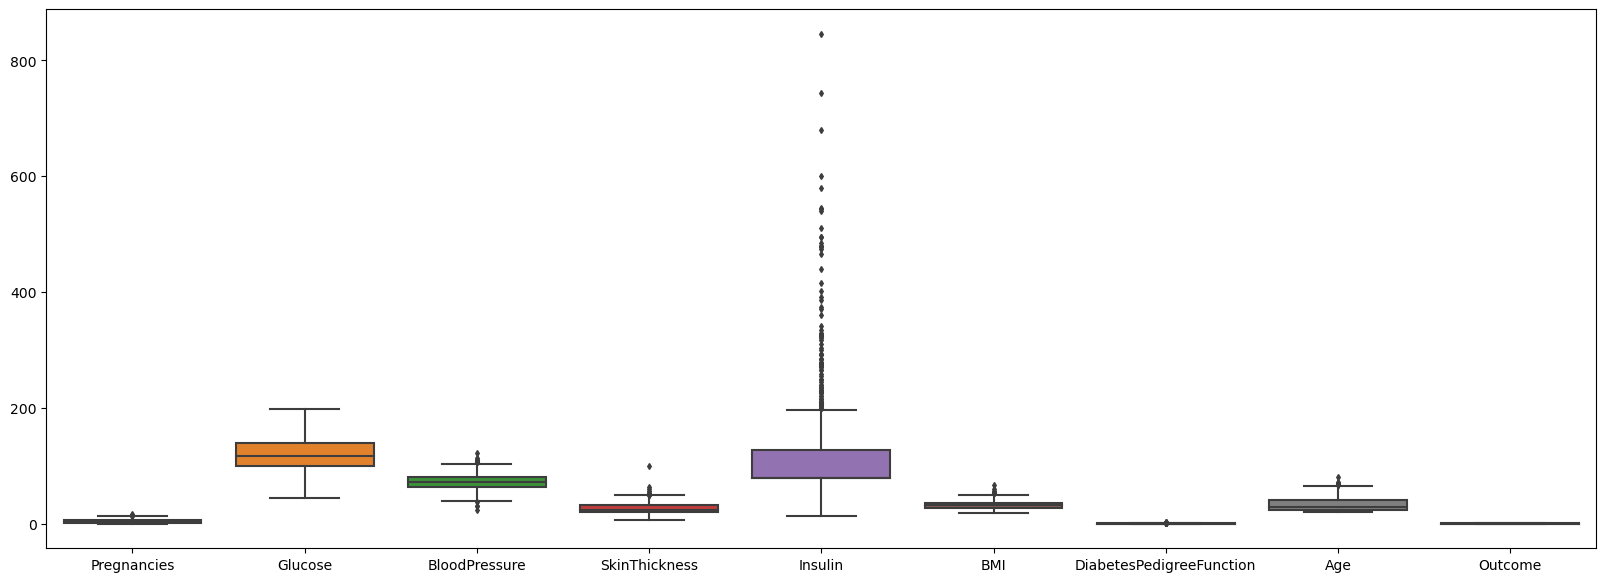

In [15]:
# Now visualize outliers in dataset 

import matplotlib.pyplot as plt
import seaborn as sns 

plt , axe = plt.subplots(figsize=(20,7))
sns.boxplot(data=df,width=0.8,ax= axe ,fliersize=3 )

## Observation 
  * There are outliers in Insulin columns

In [18]:
## Independent and Dependent features 

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Model Training 

In [21]:
# Now separate data into train and test 

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
#display the rows and columns 
X_train.shape,y_train.shape,X_test.shape,y_train.shape

((537, 8), (537,), (231, 8), (537,))

In [24]:
# perform feature scaling 

from sklearn.preprocessing import StandardScaler

In [25]:
# Instace 
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# import logisicregression 

from sklearn.linear_model import LogisticRegression


In [28]:
#Instance

classifier = LogisticRegression()

In [29]:
## Hyperparameter Tunning GridSearchCv

from sklearn.model_selection import GridSearchCV

In [32]:
parameters = {'penalty' : ['l1','l2','elasticnet'], 'C' : np.logspace(-3,3,7),
              'solver':['lbfgs', 'liblinear', 'newton-cg']}

In [33]:
grid = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=12)

In [34]:
grid.fit(X_train,y_train)

GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [35]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [36]:
grid.best_score_

0.7783670033670034

In [37]:
grid.best_index_

19

In [38]:
grid.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [39]:
## Check the model performance on test dataset

y_pred_test = grid.predict(X_test)

In [40]:
# Now we will check accuracy , classification , confusion matrix 

from sklearn.metrics import confusion_matrix , accuracy_score , classification_report 

In [41]:
print(confusion_matrix(y_pred_test,y_test))
print(accuracy_score(y_pred_test,y_test))
print(classification_report(y_pred_test,y_test))

[[123  34]
 [ 28  46]]
0.7316017316017316
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       157
           1       0.57      0.62      0.60        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.73       231

